# Базовый рабочий вариант
### SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [3]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample, SentencesDataset
import numpy as np
import torch
from torch.utils.data import DataLoader

# Загрузите модель SentenceTransformer
model_name = 'paraphrase-MiniLM-L6-v2'
model = SentenceTransformer(model_name)

# Загрузите данные
data = pd.read_csv('Bot/Q_and_A_data2 .csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

user_query = "курсы?"
user_query_embedding = model.encode([user_query])
similarities = cosine_similarity(user_query_embedding, embeddings)

closest_row_index = np.argmax(similarities)
closest_answer = data.loc[closest_row_index, 'Ответы']

print("Ближайший по контексту ответ:", closest_answer)

Ближайший по контексту ответ: Курс «Турбо» 
5 процедур антицеллюлитного массажа:
Скомбинируем разными техниками, дренажный, антицеллюлитный, медовый, массаж с горячим скрабом, после каждого массажа сделаем обёртывание 
Зоны: живот, бока, ноги, ягодицы 
Цена: 5000₽ 


## Выводит Топ 3 ближайших по контексту ответа

In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model_name = 'sentence-transformers/msmarco-distilbert-base-tas-b'
model = SentenceTransformer(model_name)

# Загрузите данные
data = pd.read_csv('Bot/Q_and_A_data2 .csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

user_query = "какой массаж делаете?"
user_query_embedding = model.encode([user_query])
similarities = cosine_similarity(user_query_embedding, embeddings)

# Получите индексы сортированных близостей в порядке убывания
sorted_indices = np.argsort(similarities[0])[::-1]

# Выберите три наиболее близких индекса
top_indices = sorted_indices[:3]

# Выведите ответы, соответствующие этим индексам
closest_answers = data.loc[top_indices, 'Ответы']

print("Топ 3 ближайших по контексту ответа:")
for idx, answer in enumerate(closest_answers):
    print(f"{idx + 1}. {answer}")


Топ 3 ближайших по контексту ответа:
1. Давайте разберемся какой массаж лучше ручной корректирующий или  аппаратный?
Если ваша цель - избавиться от лишних килограммов, смоделировать силуэт и устранить целлюлитную корочку, то методики аппаратного и ручного массажа показывают одинаковые результаты. Выбор той или иной методики зависит от ваших личных предпочтений, показаний и противопоказаний, а также рекомендаций специалиста.
Если провести одну и ту же процедуру одинаковым по объемам пациентам, результат все равно будет разным.
Всё очень индивидуально.
Ручной массаж эффективен, если специалист опытный и понимает физиологию человека.
Цель массажа - улучшить микроциркуляцию подкожно-жировой клетчатки, обмен веществ, эластичность стенок сосудов, а также укрепить дополнительными процедурами, чтобы повысить внутренние силы организма. Помимо массажа и процедур человек должен соблюдать режим, правильно питаться, иметь физические нагрузки. Учтите, что очень многое, включая эффективность процедур

### Выводит Топ 3 ближайших по контексту ответа + Метрика cosine_similarity

In [6]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model_name = 'sentence-transformers/msmarco-distilbert-base-tas-b'
model = SentenceTransformer(model_name)

# Загрузите данные
data = pd.read_csv('Bot/Q_and_A_data2 .csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

user_query = "массаж?"
user_query_embedding = model.encode([user_query])
similarities = cosine_similarity(user_query_embedding, embeddings)

# Получите индексы сортированных близостей в порядке убывания
sorted_indices = np.argsort(similarities[0])[::-1]

# Выберите три наиболее близких индекса
top_indices = sorted_indices[:3]

# Выведите ответы, соответствующие этим индексам и метрику cosine_similarity
print("Топ 3 ближайших по контексту ответа:")
for idx, answer_idx in enumerate(top_indices):
    answer = data.loc[answer_idx, 'Ответы']
    similarity = similarities[0, answer_idx]
    print(f"{idx + 1}. Ответ: {answer}")
    print(f"   Метрика cosine_similarity: {similarity:.4f}")

Топ 3 ближайших по контексту ответа:
1. Ответ: Давайте разберемся какой массаж лучше ручной корректирующий или  аппаратный?
Если ваша цель - избавиться от лишних килограммов, смоделировать силуэт и устранить целлюлитную корочку, то методики аппаратного и ручного массажа показывают одинаковые результаты. Выбор той или иной методики зависит от ваших личных предпочтений, показаний и противопоказаний, а также рекомендаций специалиста.
Если провести одну и ту же процедуру одинаковым по объемам пациентам, результат все равно будет разным.
Всё очень индивидуально.
Ручной массаж эффективен, если специалист опытный и понимает физиологию человека.
Цель массажа - улучшить микроциркуляцию подкожно-жировой клетчатки, обмен веществ, эластичность стенок сосудов, а также укрепить дополнительными процедурами, чтобы повысить внутренние силы организма. Помимо массажа и процедур человек должен соблюдать режим, правильно питаться, иметь физические нагрузки. Учтите, что очень многое, включая эффективность п

In [7]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model_name = 'sentence-transformers/msmarco-distilbert-base-tas-b'
model = SentenceTransformer(model_name)

# Загрузите данные
data = pd.read_csv('Bot/Q_and_A_data2 .csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

user_query = "курс?"
user_query_embedding = model.encode([user_query])
similarities = cosine_similarity(user_query_embedding, embeddings)

# Получите индексы сортированных близостей в порядке убывания
sorted_indices = np.argsort(similarities[0])[::-1]

# Выберите три наиболее близких индекса вопросов
top_question_indices = [idx for idx in sorted_indices if data.loc[idx, 'Вопросы'] != user_query][:3]

# Выведите топ 3 ближайших вопроса и метрику cosine_similarity
print("Топ 3 ближайших вопроса:")
for idx, question_idx in enumerate(top_question_indices):
    question = data.loc[question_idx, 'Вопросы']
    similarity = similarities[0, question_idx]
    print(f"{idx + 1}. Вопрос: {question}")
    print(f"   Метрика cosine_similarity: {similarity:.4f}")


Топ 3 ближайших вопроса:
1. Вопрос: Какой у вас адрес?
   Метрика cosine_similarity: 0.9213
2. Вопрос: Какой массаж лучше?
   Метрика cosine_similarity: 0.9202
3. Вопрос: Курс это сколько процедур?
   Метрика cosine_similarity: 0.9177


### MS MARCO - это крупномасштабный информационно-поисковый корпус, созданный на основе реальных поисковых запросов пользователей с помощью поисковой системы Bing. Предоставленные модели могут быть использованы для семантического поиска, т.е. заданы ключевые слова / поисковая фраза / вопрос, модель найдет отрывки, которые имеют отношение к поисковому запросу.

# Модели Marco, настроенные для использования с dot-product:

Модели с нормализованными вложениями предпочтут извлечение более коротких проходов, в то время как модели, настроенные на dot-product, предпочтут извлечение более длинных проходов. В зависимости от вашей задачи вы можете предпочесть тот или иной тип модели

In [8]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model = SentenceTransformer("sentence-transformers/msmarco-distilbert-base-tas-b")


# Загрузите данные
data = pd.read_csv('Bot/Q_and_A_data2 .csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

# Задайте пользовательский запрос
user_query = "Какой массаж вы делаете?"

# Получите векторное представление для пользовательского запроса
user_query_embedding = model.encode([user_query])

# Вычислите близость между пользовательским запросом и всеми векторами
similarities = cosine_similarity(user_query_embedding, embeddings)

# Найдите индексы трех наиболее близких вопросов
closest_indices = np.argsort(similarities[0])[-3:][::-1]

# Создайте векторное представление для исходного пользовательского запроса
original_query_embedding = model.encode([user_query])

# Вычислите близость между наиболее близкими вопросами и исходным запросом
similarities_with_original_query = cosine_similarity(original_query_embedding, embeddings[closest_indices])

# Найдите индексы трех наиболее близких ответов к наиболее близким вопросам
closest_answer_indices = np.argsort(similarities_with_original_query[0])[-5:][::-1]

# Выведите 3 наиболее подходящих варианта вопросов и ответов
for idx in closest_answer_indices:
    print(f"Вопрос: {data.loc[closest_indices[idx], 'Вопросы']}")
    print(f"Близость к исходному запросу: {similarities_with_original_query[0][idx]:.4f}")
    print(f"Ответ: {data.loc[closest_indices[idx], 'Ответы']}")
    print()


Вопрос: Какой массажа вы делаете?
Близость к исходному запросу: 0.9985
Ответ: Мы делаем такие виды массажа как: 
карамельная липосакция,
антицеллюлитный массаж, 
медовый массаж, 
лимфодренажный массаж(ручной и аппаратный),
обертывание, дренажный массаж, 
массаж с горячим скрабом, 
аппаратный массаж, 
вибромассаж, кавитация, 
вакумный массаж, 
биофотон, 
массаж лица классический, 
сплит массаж лица. 

Вопрос: Какой массаж вы посоветуете?
Близость к исходному запросу: 0.9969
Ответ: Зависит от того какая у вас проблема, мы работаем с отечностью и лишним весом.

Вопрос: какой массаж вы посоветуете?

Близость к исходному запросу: 0.9969
Ответ: Мы советуем попробовать массаж «карамельная липосакция»:
Целью процедуры является оздоровление, релаксация организма, снижение веса, омоложение кожи.
Воздействуя через кожный покров, компоненты активизируют процессы обмена веществ, улучшают кровообращение, выводят токсины и шлаки из организма и улучшают самочувствие.
После процедур кожа становится нео


В данном коде используется метрика "Близость к исходному запросу" (Similarity to Original Query), которая представляет собой косинусное сходство (cosine similarity) между векторным представлением исходного пользовательского запроса и векторными представлениями наиболее близких вопросов. Эта метрика показывает, насколько близко вопросы к исходному запросу пользователя. Значение метрики находится в диапазоне от -1 до 1, где 1 означает полное сходство, а -1 означает полное различие.

Метрика рассчитывается с использованием функции cosine_similarity из библиотеки sklearn.metrics.pairwise. В коде она используется для вычисления косинусного сходства между векторным представлением исходного запроса и векторными представлениями наиболее близких вопросов.

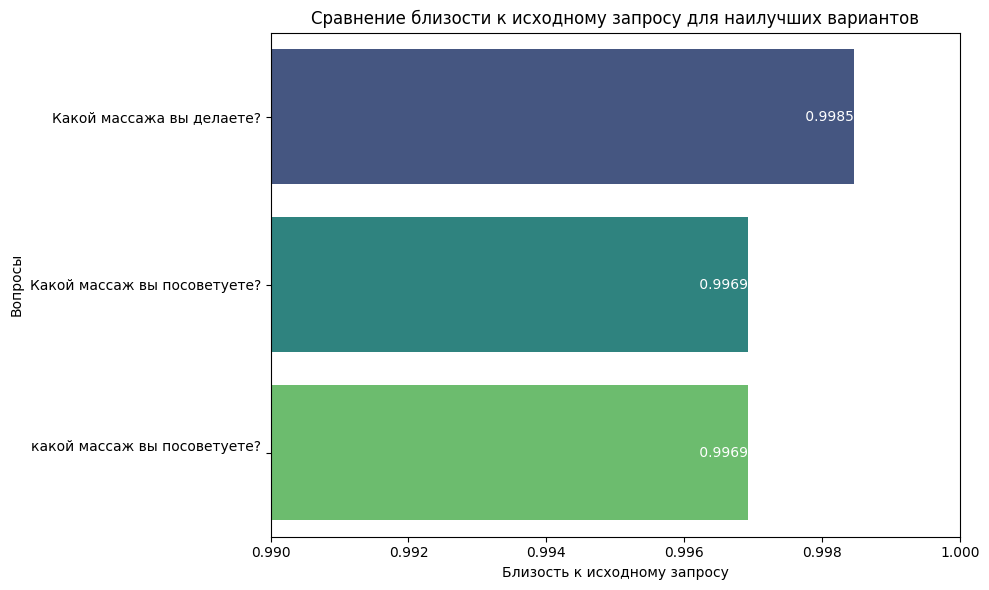

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создайте DataFrame для хранения метрик и текстов
metrics_data = {
    'Вопросы': [data.loc[closest_indices[idx], 'Вопросы'] for idx in closest_answer_indices],
    'Близость к исходному запросу': [similarities_with_original_query[0][idx] for idx in closest_answer_indices]
}
metrics_df = pd.DataFrame(metrics_data)

# Создайте график с помощью Seaborn

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Близость к исходному запросу', y='Вопросы', data=metrics_df, palette='viridis')

# Добавьте метрику на столбцы
for idx, row in metrics_df.iterrows():
    ax.text(row['Близость к исходному запросу'], idx, f" {row['Близость к исходному запросу']:.4f}", color='white', ha="right", va="center")

# Установите пределы оси x

plt.xlabel('Близость к исходному запросу')
plt.ylabel('Вопросы')
plt.title('Сравнение близости к исходному запросу для наилучших вариантов')
plt.tight_layout()
plt.show()







Эти модели Marco производят нормализованные векторы длины 1, которые могут использоваться с dot-product, косинусходством и евклидовым расстоянием:

производит нормализованное вложение и может использоваться с dot-product, косинусходством или евклидовым расстоянием (все три оценочных функции дадут одинаковые результаты). Модели, настроенные на точечное произведение, будут производить вложения разной длины и должны использоваться с точечным продуктом для поиска близких элементов в векторном пространстве.

In [66]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model = SentenceTransformer("sentence-transformers/msmarco-MiniLM-L12-cos-v5")


# Загрузите данные
data = pd.read_csv('data/Q_and_A_data2 .csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

# Задайте пользовательский запрос
user_query = "Какой массаж вы делаете?"

# Получите векторное представление для пользовательского запроса
user_query_embedding = model.encode([user_query])

# Вычислите близость между пользовательским запросом и всеми векторами
similarities = cosine_similarity(user_query_embedding, embeddings)

# Найдите индексы трех наиболее близких вопросов
closest_indices = np.argsort(similarities[0])[-3:][::-1]

# Создайте векторное представление для исходного пользовательского запроса
original_query_embedding = model.encode([user_query])

# Вычислите близость между наиболее близкими вопросами и исходным запросом
similarities_with_original_query = cosine_similarity(original_query_embedding, embeddings[closest_indices])

# Найдите индексы трех наиболее близких ответов к наиболее близким вопросам
closest_answer_indices = np.argsort(similarities_with_original_query[0])[-3:][::-1]

# Выведите 3 наиболее подходящих варианта вопросов и ответов
for idx in closest_answer_indices:
    print(f"Вопрос: {data.loc[closest_indices[idx], 'Вопросы']}")
    print(f"Близость к исходному запросу: {similarities_with_original_query[0][idx]:.4f}")
    print(f"Ответ: {data.loc[closest_indices[idx], 'Ответы']}")
    print()

Вопрос: Какой массажа вы делаете?
Близость к исходному запросу: 0.9928
Ответ: Мы делаем такие виды массажа как: 
карамельная липосакция,
антицеллюлитный массаж, 
медовый массаж, 
лимфодренажный массаж(ручной и аппаратный),
обертывание, дренажный массаж, 
массаж с горячим скрабом, 
аппаратный массаж, 
вибромассаж, кавитация, 
вакумный массаж, 
биофотон, 
массаж лица классический, 
сплит массаж лица. 

Вопрос: Какой массаж вы посоветуете?
Близость к исходному запросу: 0.9784
Ответ: Зависит от того какая у вас проблема, мы работаем с отечностью и лишним весом.

Вопрос: какой массаж вы посоветуете?

Близость к исходному запросу: 0.9784
Ответ: Мы советуем попробовать массаж «карамельная липосакция»:
Целью процедуры является оздоровление, релаксация организма, снижение веса, омоложение кожи.
Воздействуя через кожный покров, компоненты активизируют процессы обмена веществ, улучшают кровообращение, выводят токсины и шлаки из организма и улучшают самочувствие.
После процедур кожа становится нео

# Эти модели были настроены для использования с dot-product:

In [49]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model = SentenceTransformer("sentence-transformers/multi-qa-mpnet-base-dot-v1")


# Загрузите данные
data = pd.read_csv('data/Q_and_A_data_Last.csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

# Задайте пользовательский запрос
user_query = "Какой массаж вы делаете?"

# Получите векторное представление для пользовательского запроса
user_query_embedding = model.encode([user_query])

# Вычислите близость между пользовательским запросом и всеми векторами
similarities = cosine_similarity(user_query_embedding, embeddings)

# Найдите индексы трех наиболее близких вопросов
closest_indices = np.argsort(similarities[0])[-3:][::-1]

# Создайте векторное представление для исходного пользовательского запроса
original_query_embedding = model.encode([user_query])

# Вычислите близость между наиболее близкими вопросами и исходным запросом
similarities_with_original_query = cosine_similarity(original_query_embedding, embeddings[closest_indices])

# Найдите индексы трех наиболее близких ответов к наиболее близким вопросам
closest_answer_indices = np.argsort(similarities_with_original_query[0])[-3:][::-1]

# Выведите 3 наиболее подходящих варианта вопросов и ответов
for idx in closest_answer_indices:
    print(f"Вопрос: {data.loc[closest_indices[idx], 'Вопросы']}")
    print(f"Близость к исходному запросу: {similarities_with_original_query[0][idx]:.4f}")
    print(f"Ответ: {data.loc[closest_indices[idx], 'Ответы']}")
    print()


Вопрос: Какой массажа вы делаете?
Близость к исходному запросу: 0.9963
Ответ: Мы делаем такие виды массажа как: карамельная липосакция, антицеллюлитный массаж, медовый массаж, лимфодренажный массаж(ручной и аппаратный),обертывание, дренажный массаж, массаж с горячим скрабом, аппаратный массаж, вибромассаж, кавитация, вакумный массаж, биофотон, массаж лица классический, сплит массаж лица.

Вопрос: Какие виды массажа вы делаете?
Близость к исходному запросу: 0.9721
Ответ: Мы делаем такие виды массажа как: 
карамельная липосакция, антицеллюлитный массаж, медовый массаж, лимфодренажный массаж(ручной и аппаратный),обертывание, дренажный массаж, массаж с горячим скрабом, аппаратный массаж, вибромассаж, кавитация, вакумный массаж, биофотон, массаж лица классический, сплит массаж лица. 

Вопрос: Сколько по времени длиться вакумный массаж?
Близость к исходному запросу: 0.8380
Ответ: Вакуумный массаж с встроенным рф-лифтингом, одновременное использование Вакуумного массажа, фотохроматерапии и RF

# Эти модели производят нормализованные векторы длины 1, которые могут использоваться с dot-product, косинусходством и евклидовым расстоянием:

производит нормализованное вложение и может использоваться с dot-product, косинусходством или евклидовым расстоянием (все три оценочных функции дадут одинаковые результаты). Модели, настроенные на точечное произведение, будут производить вложения разной длины и должны использоваться с точечным продуктом для поиска близких элементов в векторном пространстве.

In [50]:
import pandas as pd
from sentence_transformers import SentenceTransformer, InputExample
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Загрузите модель SentenceTransformer
model = SentenceTransformer("sentence-transformers/multi-qa-distilbert-cos-v1")


# Загрузите данные
data = pd.read_csv('data/Q_and_A_data_Last.csv')  # Путь к вашим данным

# Создайте обучающие примеры для SentenceTransformers
train_examples = []
for _, row in data.iterrows():
    question = row['Вопросы']
    answer = row['Ответы']
    train_examples.append(InputExample(texts=[question, answer]))

# Создайте векторные представления для всех текстов
embeddings = model.encode([example.texts[0] for example in train_examples])

# Задайте пользовательский запрос
user_query = "Какой массаж вы делаете?"

# Получите векторное представление для пользовательского запроса
user_query_embedding = model.encode([user_query])

# Вычислите близость между пользовательским запросом и всеми векторами
similarities = cosine_similarity(user_query_embedding, embeddings)

# Найдите индексы трех наиболее близких вопросов
closest_indices = np.argsort(similarities[0])[-3:][::-1]

# Создайте векторное представление для исходного пользовательского запроса
original_query_embedding = model.encode([user_query])

# Вычислите близость между наиболее близкими вопросами и исходным запросом
similarities_with_original_query = cosine_similarity(original_query_embedding, embeddings[closest_indices])

# Найдите индексы трех наиболее близких ответов к наиболее близким вопросам
closest_answer_indices = np.argsort(similarities_with_original_query[0])[-3:][::-1]

# Выведите 3 наиболее подходящих варианта вопросов и ответов
for idx in closest_answer_indices:
    print(f"Вопрос: {data.loc[closest_indices[idx], 'Вопросы']}")
    print(f"Близость к исходному запросу: {similarities_with_original_query[0][idx]:.4f}")
    print(f"Ответ: {data.loc[closest_indices[idx], 'Ответы']}")
    print()

Вопрос: Какой массажа вы делаете?
Близость к исходному запросу: 0.9721
Ответ: Мы делаем такие виды массажа как: карамельная липосакция, антицеллюлитный массаж, медовый массаж, лимфодренажный массаж(ручной и аппаратный),обертывание, дренажный массаж, массаж с горячим скрабом, аппаратный массаж, вибромассаж, кавитация, вакумный массаж, биофотон, массаж лица классический, сплит массаж лица.

Вопрос: Какие виды массажа вы делаете?
Близость к исходному запросу: 0.9284
Ответ: Мы делаем такие виды массажа как: 
карамельная липосакция, антицеллюлитный массаж, медовый массаж, лимфодренажный массаж(ручной и аппаратный),обертывание, дренажный массаж, массаж с горячим скрабом, аппаратный массаж, вибромассаж, кавитация, вакумный массаж, биофотон, массаж лица классический, сплит массаж лица. 

Вопрос: Какой массаж вы посоветуете?
Близость к исходному запросу: 0.8132
Ответ: Зависит от того какая у вас проблема, мы работаем с отечностью и лишним весом.



In [56]:
# from sentence_transformers import SentenceTransformer, InputExample, losses
# from torch.utils.data import DataLoader
# import pandas as pd

# # Загрузите предобученную модель
# model = SentenceTransformer("sentence-transformers/msmarco-distilbert-base-tas-b")

# # Загрузите и подготовьте ваши данные
# data = pd.read_csv("data/Q_and_A_data_Last.csv")  # Загрузите набор данных с парами вопросов и ответов

# # Создайте список для хранения объектов InputExample для обучения
# train_examples = []

# # Создайте объекты InputExample для обучения и добавьте их в список
# for _, row in data.iterrows():
#     question = row['Вопросы']
#     answer = row['Ответы']
#     train_examples.append(InputExample(texts=[question, answer], label=0.0))  # Используйте тип данных float для меток

# # Создайте DataLoader для обучения
# train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=8)

# # Задайте функцию потерь
# train_loss = losses.CosineSimilarityLoss(model)

# # Обучение модели
# model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=3)



Epoch: 100%|██████████| 3/3 [02:04<00:00, 41.44s/it]


In [63]:
# from sentence_transformers import SentenceTransformer
# import pandas as pd

# # Загрузите обученную модель
# model = SentenceTransformer("sentence-transformers/msmarco-distilbert-base-tas-b")

# # Загрузите исходные данные (здесь предполагается, что вы используете тот же код для подготовки данных)
# data = pd.read_csv("data/Q_and_A_data_Last.csv")

# # Преобразуйте текст в векторное представление с помощью обученной модели
# question_vectors = model.encode(data['Вопросы'].tolist(), convert_to_tensor=True)
# answer_vectors = model.encode(data['Ответы'].tolist(), convert_to_tensor=True)

# # Теперь у вас есть векторные представления для вопросов и ответов, которые можно использовать для дальнейшего анализа
# # Например, для поиска наиболее похожих ответов на заданный вопрос
# query = "Какой массаж вы делаете?"
# query_vector = model.encode(query, convert_to_tensor=True)
# # Convert similar_indices to a Python list
# # Преобразовать similar_indices в список Python
# # Вычислить индексы похожих ответов
# similar_indices = (answer_vectors @ query_vector.T).argsort(dim=0, descending=True)

# # Преобразовать similar_indices в список Python
# similar_indices_list = similar_indices.squeeze().tolist()

# # Вывести наиболее похожие ответы
# for idx in similar_indices_list:
#     print("Вопрос:", query)
#     print("Похожий ответ:", data['Ответы'][idx])





Вопрос: Какой массаж вы делаете?
Похожий ответ: Классический массаж лица ВКЛЮЧАЕТ В СЕБЯ:
ЛИМФОДРЕНАЖНЫЙ МАССАЖ
СКУЛЬПТУРНЫЙ
БУККАЛЬНЫЙ
ЗОНА ДЕКОЛЬТЕ 
МАССАЖ ГОЛОВЫ
Вопрос: Какой массаж вы делаете?
Похожий ответ: Курс «плоский животик» 
10 процедур антицеллюлитного ручного массажа (зоны:живот/бока)
Цена 6.000₽ 
Вопрос: Какой массаж вы делаете?
Похожий ответ: До массажа не кушаем час и после 2 часа нельзя кушать ( не приходите голодными)
Вопрос: Какой массаж вы делаете?
Похожий ответ: Сплит массаж лица
Стоимость 3000₽

Вопрос: Какой массаж вы делаете?
Похожий ответ: Медовый массаж – это вид массажа, при котором массажист вместо крема или масла использует мед. Техника медового массажа отличается от классического.
Вопрос: Какой массаж вы делаете?
Похожий ответ: Курсы "Турбо", "Плоский животик", "Стройные ножки", "Аппаратный массаж", Вибромассаж"
Вопрос: Какой массаж вы делаете?
Похожий ответ: Сплит массаж лица * Длительность около 2-х часов
Вопрос: Какой массаж вы делаете?
Похожий ответ: 